<a href="datacamp.com/workspacecompetition" target="_blank">![banner](banner.png)</a>

# Loan Data

Ready to put your coding skills to the test? Join us for our Workspace Competition.  
For more information, visit [datacamp.com/workspacecompetition](https://datacamp.com/workspacecompetition) 

## Context
This dataset ([source](https://www.kaggle.com/itssuru/loan-data)) consists of data from almost 10,000 borrowers that took loans - with some paid back and others still in progress. It was extracted from lendingclub.com which is an organization that connects borrowers with investors. We've included a few suggested questions at the end of this template to help you get started.

In [1]:
# Load packages
import numpy as np 
import pandas as pd

## Load your data

In [2]:
# Load data from the csv file
df = pd.read_csv('loan_data1.csv', index_col=None)

# Change the dots in the column names to underscores
df.columns = [c.replace(".", "_") for c in df.columns]
print(f"Number of rows/records: {df.shape[0]}")
print(f"Number of columns/variables: {df.shape[1]}")
df.head()

Number of rows/records: 9578
Number of columns/variables: 14


,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [3]:
variables = pd.DataFrame(columns=['Variable','Number of unique values','Values'])
for i, var in enumerate(df.columns):
    variables.loc[i] = [var, df[var].nunique(), df[var].unique().tolist()]
variables.head()

,Variable,Number of unique values,Values
0,credit_policy,2,"[1, 0]"
1,purpose,7,"[debt_consolidation, credit_card, all_other, h..."
2,int_rate,249,"[0.1189, 0.1071, 0.1357, 0.1008, 0.1426, 0.078..."
3,installment,4788,"[829.1, 228.22, 366.86, 162.34, 102.92, 125.13..."
4,log_annual_inc,1987,"[11.35040654, 11.08214255, 10.37349118, 11.299..."


In [4]:
from pandas import option_context
var_dict = pd.read_csv('variable_explanation.csv', index_col=0)

with option_context('display.max_colwidth', 400):
    display(var_dict)

,Explanation
Variable,
credit_policy,1 if the customer meets the credit underwriting criteria; 0 otherwise.
purpose,The purpose of the loan.
int_rate,The interest rate of the loan (more risky borrowers are assigned higher interest rates).
installment,The monthly installments owed by the borrower if the loan is funded.
log_annual_inc,The natural log of the self-reported annual income of the borrower.
dti,The debt-to-income ratio of the borrower (amount of debt divided by annual income).
fico,The FICO credit score of the borrower.
days_with_cr_line,The number of days the borrower has had a credit line.
revol_bal,The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).


## Understand your variables

In [5]:
# Understand your variables
variables = pd.DataFrame(columns=['Variable','Number of unique values','Number of nulls','Values'])

for i, var in enumerate(df.columns):
    variables.loc[i] = [var, df[var].nunique(),df[var].isnull().sum(), df[var].unique().tolist()]
    
# Join with the variables dataframe
var_dict = pd.read_csv('variable_explanation.csv', index_col=0)
variables.set_index('Variable').join(var_dict)

,Number of unique values,Number of nulls,Values,Explanation
Variable,,,,
credit_policy,2,0,"[1, 0]",1 if the customer meets the credit underwritin...
purpose,7,0,"[debt_consolidation, credit_card, all_other, h...",The purpose of the loan.
int_rate,249,0,"[0.1189, 0.1071, 0.1357, 0.1008, 0.1426, 0.078...",The interest rate of the loan (more risky borr...
installment,4788,0,"[829.1, 228.22, 366.86, 162.34, 102.92, 125.13...",The monthly installments owed by the borrower ...
log_annual_inc,1987,0,"[11.35040654, 11.08214255, 10.37349118, 11.299...",The natural log of the self-reported annual in...
dti,2529,0,"[19.48, 14.29, 11.63, 8.1, 14.97, 16.98, 4.0, ...",The debt-to-income ratio of the borrower (amou...
fico,44,0,"[737, 707, 682, 712, 667, 727, 722, 677, 662, ...",The FICO credit score of the borrower.
days_with_cr_line,2687,0,"[5639.958333, 2760.0, 4710.0, 2699.958333, 406...",The number of days the borrower has had a cred...
revol_bal,7869,0,"[28854, 33623, 3511, 33667, 4740, 50807, 3839,...",The borrower's revolving balance (amount unpai...


In [6]:
df.columns

Index(['credit_policy', 'purpose', 'int_rate', 'installment', 'log_annual_inc',
       'dti', 'fico', 'days_with_cr_line', 'revol_bal', 'revol_util',
       'inq_last_6mths', 'delinq_2yrs', 'pub_rec', 'not_fully_paid'],
      dtype='object')

Now you can start to explore this dataset with the chance to win incredible prices! Can't think of where to start? Try your hand at these suggestions:

- Extract useful insights and visualize them in the most interesting way possible.
- Find out how long it takes for users to pay back their loan.
- Build a model that can predict the probability a user will be able to pay back their loan within a certain period.
- Find out what kind of people take a loan for what purposes.

# My solution will consist of the following:
###      1. Initial data exploration and pre-processiong
###      2. EDA: Visualising data
###      3. Feature selection
###      4. Correlation and PCA Analysis
###      5. Modelling the loan payoff
###      6. Predicting the loan payoff


# 1. Initial data exploration

In [7]:
df.head()

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit_policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int_rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log_annual_inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days_with_cr_line  9578 non-null   float64
 8   revol_bal          9578 non-null   int64  
 9   revol_util         9578 non-null   float64
 10  inq_last_6mths     9578 non-null   int64  
 11  delinq_2yrs        9578 non-null   int64  
 12  pub_rec            9578 non-null   int64  
 13  not_fully_paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [9]:
df.days_with_cr_line = df.days_with_cr_line.astype(int).round() # rounding up days


In [10]:
df['not_fully_paid'].replace({0:1,1:0},inplace=True)    # swap values
df.rename(columns={'not_fully_paid':'fully_paid'},inplace=True)
df.head()

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,fully_paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639,28854,52.1,0,0,0,1
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760,33623,76.7,0,0,0,1
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710,3511,25.6,1,0,0,1
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699,33667,73.2,1,0,0,1
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066,4740,39.5,0,1,0,1


In [11]:
df['fully_paid'].value_counts()

1    8045
0    1533
Name: fully_paid, dtype: int64

#### Splitting features into numeric and non-numeric

In [12]:
num_cols = ['int_rate', 'installment', 'log_annual_inc', 'dti', 'fico', 'days_with_cr_line', 'revol_bal', 'revol_util', 'inq_last_6mths', 'delinq_2yrs', 'pub_rec']
non_cols = ['purpose']

In [13]:
df_num = df[num_cols]
df_num.head()

,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec
0,0.1189,829.10,11.350407,19.48,737,5639,28854,52.1,0,0,0
1,0.1071,228.22,11.082143,14.29,707,2760,33623,76.7,0,0,0
2,0.1357,366.86,10.373491,11.63,682,4710,3511,25.6,1,0,0
3,0.1008,162.34,11.350407,8.10,712,2699,33667,73.2,1,0,0
4,0.1426,102.92,11.299732,14.97,667,4066,4740,39.5,0,1,0


# 2. EDA: Visualising data 

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
#sns.set_theme(style="whitegrid")

 -Distribution of numeric features- 


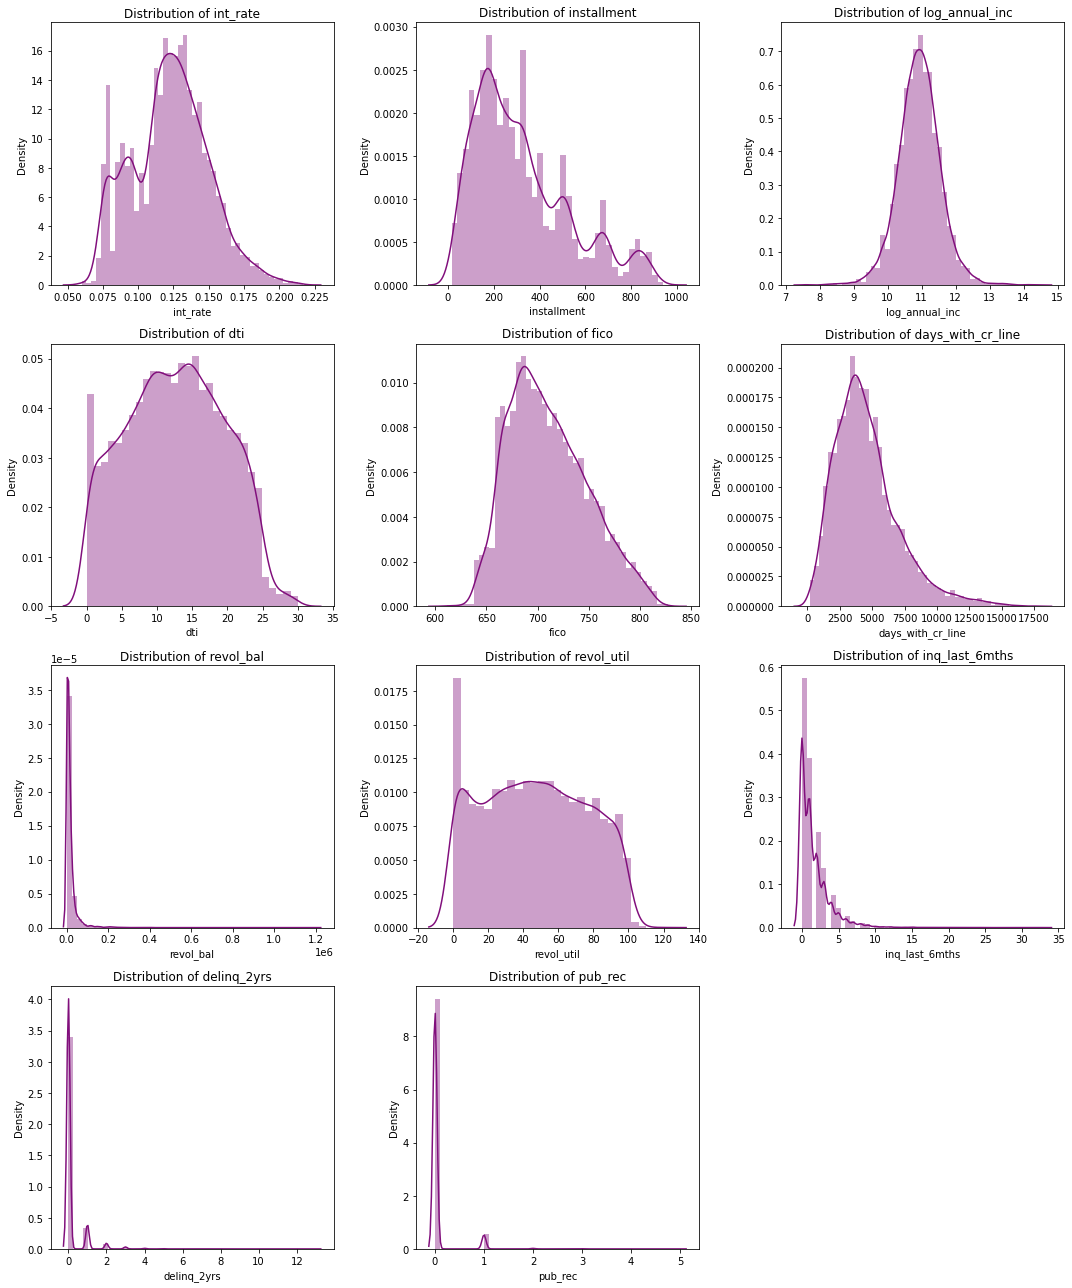

In [15]:
print(f' -Distribution of numeric features- ')
plt.figure(figsize=(15, 18))
for i, col in enumerate(num_cols):
    # Plot distribution 
    plt.subplot(4,3,i+1); sns.distplot(df_num[col], color='#810F7C')
    plt.title(f'Distribution of {col}')
# Show the plot
plt.tight_layout()
plt.show()


<span style="color:black; font-size:20px" > Some features like **log_annual_inc, fico and days_with_cr_line** appear while all the other features are highly skewed.
This can pose a problem when modelling as most machine learning models require features to be normally distributed. Therefore I will perform scaling before using these features. </span>


 ### Does a loan purpose affect is repayment?
 


<span style="color:black; font-size:20px" > Lets look at the loan purposes. Most people take loans for debt consolidation, credit card debt or other purposes.
Meanwhile, paid and not paid loans do not seem to differ much by purpose i.e. a purpose does not seem to be a useful prediction feature. </span>

In [16]:
s_sort= df.groupby('purpose')['fully_paid'].value_counts()
df_sort = s_sort.to_frame()

df_sort.rename(columns={'fully_paid':'count_purpose'},inplace=True)

df_sort.reset_index(inplace=True)
df_sort.rename(columns={'fully_paid':'loan_status'},inplace=True)
df_sort['loan_status'].replace({1:'Fully paid',0:'Not fully paid'},inplace=True)  
df_sort.sort_values(by=['count_purpose'], ascending=False, inplace=True)
df_sort.head()

,purpose,loan_status,count_purpose
4,debt_consolidation,Fully paid,3354
0,all_other,Fully paid,1944
2,credit_card,Fully paid,1116
5,debt_consolidation,Not fully paid,603
8,home_improvement,Fully paid,522


In [17]:
df_ = df_sort.groupby(by = 'loan_status').sum().T
dfn = df_.rename(index={'count_purpose': ''})
dfn

loan_status,Fully paid,Not fully paid
,8045,1533


In [18]:
df_sort_paid = df_sort[df_sort.loan_status=='Fully paid']
df_sort_paid.count_purpose = round(df_sort_paid.count_purpose/8045*100,2)
df_sort_paid.rename(columns= {'count_purpose':'count_purpose_paid'}, inplace=True)
df_sort_not_paid = df_sort[df_sort.loan_status=='Not fully paid']
df_sort_not_paid.count_purpose = round(df_sort_not_paid.count_purpose/1533*100,2)
df_sort_not_paid.rename(columns= {'count_purpose':'count_purpose_not_paid'}, inplace=True)
df_sort_all = df_sort_paid.merge(df_sort_not_paid,how='inner', on='purpose')
df_sort_all

,purpose,loan_status_x,count_purpose_paid,loan_status_y,count_purpose_not_paid
0,debt_consolidation,Fully paid,41.69,Not fully paid,39.33
1,all_other,Fully paid,24.16,Not fully paid,25.24
2,credit_card,Fully paid,13.87,Not fully paid,9.52
3,home_improvement,Fully paid,6.49,Not fully paid,6.98
4,small_business,Fully paid,5.56,Not fully paid,11.22
5,major_purchase,Fully paid,4.82,Not fully paid,3.20
6,educational,Fully paid,3.41,Not fully paid,4.50


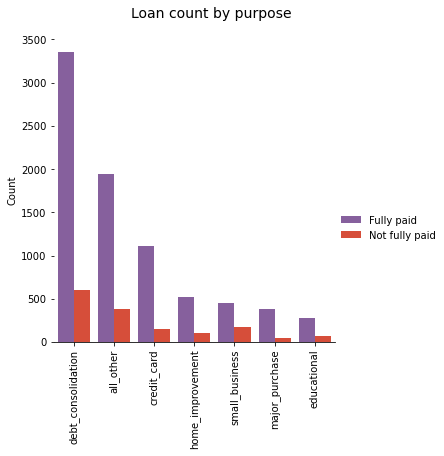

In [19]:
# Lets plot the loan purpose data.
plot = sns.catplot(data=df_sort, kind="bar",x="purpose", y="count_purpose", palette=['#8856a7', '#f03b20'], hue="loan_status" )

plot.legend.set_title("")
plot.set_axis_labels("", "Count")
            
for axes in plot.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)#.set(title='Title of Plot')

plot.fig.suptitle('Loan count by purpose', y=1.05, fontsize=14)

plot.despine(left=True)

<span style="color:black; font-size:20px" > **Small business** and **credit card** are the purposes with the highest proportion of unpaid loans. </span>

In [20]:
df['fully_paid'].replace({0:'Not fully paid',1: 'Fully paid'}, inplace=True)
df.head()

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,fully_paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639,28854,52.1,0,0,0,Fully paid
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760,33623,76.7,0,0,0,Fully paid
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710,3511,25.6,1,0,0,Fully paid
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699,33667,73.2,1,0,0,Fully paid
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066,4740,39.5,0,1,0,Fully paid


In [21]:
df.fully_paid.value_counts(normalize=True).round(2)

Fully paid        0.84
Not fully paid    0.16
Name: fully_paid, dtype: float64

In [22]:
dfn['total'] = dfn['Fully paid']+dfn['Not fully paid']
dfn

loan_status,Fully paid,Not fully paid,total
,8045,1533,9578


In [23]:
df_rel = (dfn[dfn.columns[0:2]].div(dfn.iloc[0, 2])*100).round(2)
df_rel.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries,  to 
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Fully paid      1 non-null      float64
 1   Not fully paid  1 non-null      float64
dtypes: float64(2)
memory usage: 24.0+ bytes


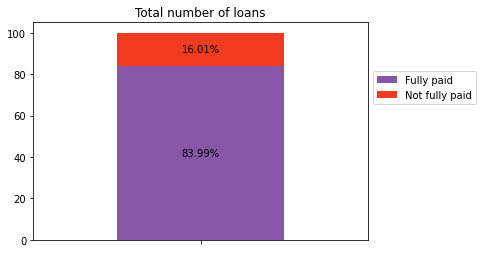

In [24]:
myplot = df_rel.plot( kind='bar',stacked = True,color= ['#8856a7', '#f03b20'], title="Total number of loans") # this is ok
h = 0
for col in df_rel:
    #h += (p := df_rel[col].iat[0])      # calculate current bar height
    p = df_rel[col].iloc[0]
    h += p
    plt.text(0, h - p / 2, f'{p}%', va='center', ha='center')
myplot.legend(bbox_to_anchor=(1.0, 0.8))
plt.show()

<span style="color:black; font-size:21px" > We can see that around 16% of loans are not fully paid, so this is an imbalanced dataset. The best model would be the one predicting which loans are prone to default. </span>

### How long it takes for users to pay back their loans?
I assume this could be measured by the number of days a successful borrower has had a credit line for.

In [30]:
df_paid = df.loc[df.fully_paid =='Fully paid'].head()
#df_paid.days_with_cr_line.describe()

In [33]:
print('How many days on average the users had a credit line: {:.0f} days'.format(df_paid.days_with_cr_line.mean()))
print('Most users had a credit line for: {:.0f} days'.format(df_paid.days_with_cr_line.mode().round()[0]))
print('The users had a credit line from {:.0f} to {:.0f} days'.format(df_paid.days_with_cr_line.min(), df_paid.days_with_cr_line.max()))

How many days on average the users had a credit line: 3975 days
Most users had a credit line for: 2699 days
The users had a credit line from 2699 to 5639 days


## Exploring numeric features by visualisation

In [34]:
s_sort= df.groupby('purpose')['fully_paid'].value_counts()
df_sort = s_sort.to_frame()

df_sort.rename(columns={'fully_paid':'count_purpose'},inplace=True)

df_sort.reset_index(inplace=True)
df_sort.rename(columns={'fully_paid':'loan_status'},inplace=True)
df_sort['loan_status'].replace({1:'Fully paid',0:'Not fully paid'},inplace=True)  
df_sort.sort_values(by=['count_purpose'], ascending=False, inplace=True)
df_sort

,purpose,loan_status,count_purpose
4,debt_consolidation,Fully paid,3354
0,all_other,Fully paid,1944
2,credit_card,Fully paid,1116
5,debt_consolidation,Not fully paid,603
8,home_improvement,Fully paid,522
12,small_business,Fully paid,447
10,major_purchase,Fully paid,388
1,all_other,Not fully paid,387
6,educational,Fully paid,274
13,small_business,Not fully paid,172


In [35]:
s_sort_i= df.groupby('int_rate')['fully_paid'].value_counts()
df_sort_i = s_sort_i.to_frame()

df_sort_i.rename(columns={'fully_paid':'count_intrate'},inplace=True)

df_sort_i.reset_index(inplace=True)
df_sort_i.rename(columns={'fully_paid':'loan_status'},inplace=True)
df_sort_i['loan_status'].replace({1:'Fully paid',0:'Not fully paid'},inplace=True)  
df_sort_i.sort_values(by=['count_intrate'], ascending=False, inplace=True)
df_sort_i

# 'int_rate','days_with_cr_line','log_annual_inc','fico'

,int_rate,loan_status,count_intrate
171,0.1253,Fully paid,302
38,0.0894,Fully paid,275
141,0.1183,Fully paid,218
24,0.0800,Fully paid,188
56,0.0963,Fully paid,186
...,...,...,...
314,0.1551,Not fully paid,1
316,0.1557,Not fully paid,1
413,0.1793,Not fully paid,1
68,0.1001,Not fully paid,1


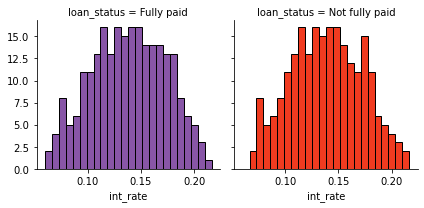

In [36]:
# similar
bins = np.linspace(df_sort_i.int_rate.min(), df_sort_i.int_rate.max(), 25)

g = sns.FacetGrid(df_sort_i, col="loan_status", hue="loan_status", palette=['#8856a7', '#f03b20'], col_wrap=2)
g.map(plt.hist, 'int_rate', bins=bins, ec="k")


plt.show()

In [37]:
s_sort_d= df.groupby('days_with_cr_line')['fully_paid'].value_counts()
df_sort_d = s_sort_d.to_frame()

df_sort_d.rename(columns={'fully_paid':'count_days'},inplace=True)

df_sort_d.reset_index(inplace=True)
df_sort_d.rename(columns={'fully_paid':'loan_status'},inplace=True)
df_sort_d['loan_status'].replace({1:'Fully paid',0:'Not fully paid'},inplace=True)  
df_sort_d.sort_values(by=['count_days'], ascending=False, inplace=True)
#df_sort_d

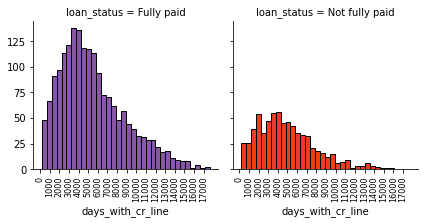

In [38]:
# more peaked and left-skewed for paid loans.
bins = np.linspace(df_sort_d.days_with_cr_line.min(), df_sort_d.days_with_cr_line.max(), 35)

g = sns.FacetGrid(df_sort_d, col="loan_status", hue="loan_status", palette=['#8856a7', '#f03b20'], col_wrap=2)
g.map(plt.hist, 'days_with_cr_line', bins=bins, ec="k")

g.set(xticks=np.arange(0,17500,1000))
g.set_xticklabels(np.arange(0,17500,1000), fontsize=8, rotation=90)
plt.show()

In [39]:
s_sort_in= df.groupby('log_annual_inc')['fully_paid'].value_counts()
df_sort_in = s_sort_in.to_frame()

df_sort_in.rename(columns={'fully_paid':'count_in'},inplace=True)

df_sort_in.reset_index(inplace=True)
df_sort_in.rename(columns={'fully_paid':'loan_status'},inplace=True)
df_sort_in['loan_status'].replace({1:'Fully paid',0:'Not fully paid'},inplace=True)  
df_sort_in.sort_values(by=['count_in'], ascending=False, inplace=True)
#df_sort_in

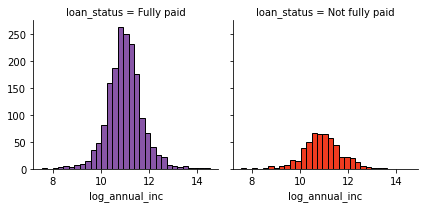

In [40]:
# more peaked for paid loans
bins = np.linspace(df_sort_in.log_annual_inc.min(), df_sort_in.log_annual_inc.max(), 32)

g = sns.FacetGrid(df_sort_in, col="loan_status", hue="loan_status", palette=['#8856a7', '#f03b20'], col_wrap=2)
g.map(plt.hist, 'log_annual_inc', bins=bins, ec="k")

plt.show()

In [41]:
s_sort_dti= df.groupby('dti')['fully_paid'].value_counts()
df_sort_dti = s_sort_dti.to_frame()

df_sort_dti.rename(columns={'fully_paid':'count_in'},inplace=True)

df_sort_dti.reset_index(inplace=True)
df_sort_dti.rename(columns={'fully_paid':'loan_status'},inplace=True)
df_sort_dti['loan_status'].replace({1:'Fully paid',0:'Not fully paid'},inplace=True)  
df_sort_dti.sort_values(by=['count_in'], ascending=False, inplace=True)
#df_sort_in

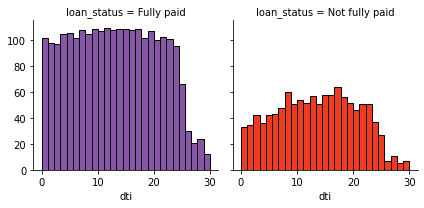

In [42]:
# more normal for not paid loans.
bins = np.linspace(df_sort_dti.dti.min(), df_sort_dti.dti.max(), 28)

g = sns.FacetGrid(df_sort_dti, col="loan_status", hue="loan_status", palette=['#8856a7', '#f03b20'], col_wrap=2)
g.map(plt.hist, 'dti', bins=bins, ec="k")

plt.show()

In [43]:
s_sort_fi= df.groupby('fico')['fully_paid'].value_counts()
df_sort_fi = s_sort_fi.to_frame()

df_sort_fi.rename(columns={'fully_paid':'count_in'},inplace=True)

df_sort_fi.reset_index(inplace=True)
df_sort_fi.rename(columns={'fully_paid':'loan_status'},inplace=True)
df_sort_fi['loan_status'].replace({1:'Fully paid',0:'Not fully paid'},inplace=True)  
df_sort_fi.sort_values(by=['count_in'], ascending=False, inplace=True)

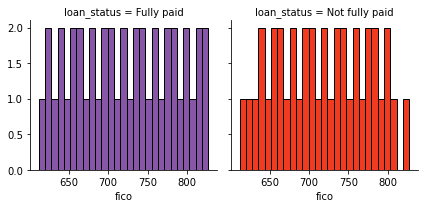

In [44]:
# seems similar
bins = np.linspace(df_sort_fi.fico.min(), df_sort_fi.fico.max(), 28)

g = sns.FacetGrid(df_sort_fi, col="loan_status", hue="loan_status", palette=['#8856a7', '#f03b20'], col_wrap=2)
g.map(plt.hist, 'fico', bins=bins, ec="k")

plt.show()

In [45]:
s_sort_ins= df.groupby('installment')['fully_paid'].value_counts()
df_sort_ins = s_sort_ins.to_frame()

df_sort_ins.rename(columns={'fully_paid':'count_in'},inplace=True)

df_sort_ins.reset_index(inplace=True)
df_sort_ins.rename(columns={'fully_paid':'loan_status'},inplace=True)
df_sort_ins['loan_status'].replace({1:'Fully paid',0:'Not fully paid'},inplace=True)  
df_sort_ins.sort_values(by=['count_in'], ascending=False, inplace=True)

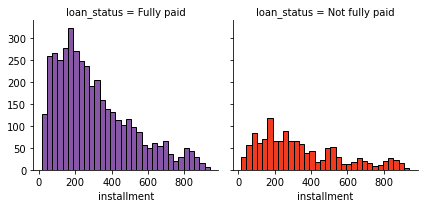

In [46]:
# more left skewed for paid loans
bins = np.linspace(df_sort_ins.installment.min(), df_sort_ins.installment.max(), 33)

g = sns.FacetGrid(df_sort_ins, col="loan_status", hue="loan_status", palette=['#8856a7', '#f03b20'], col_wrap=2)
g.map(plt.hist, 'installment', bins=bins, ec="k")

plt.show()

In [47]:
s_sort_revb= df.groupby('revol_bal')['fully_paid'].value_counts()
df_sort_revb = s_sort_revb.to_frame()
df_sort_revb.rename(columns={'fully_paid':'count_in'},inplace=True)

df_sort_revb.reset_index(inplace=True)
df_sort_revb.rename(columns={'fully_paid':'loan_status'},inplace=True)
df_sort_revb['loan_status'].replace({1:'Fully paid',0:'Not fully paid'},inplace=True)
df_sort_revb1 = df_sort_revb.loc[df_sort_revb['revol_bal'] >=50000]
df_sort_revb1.sort_values(by=['count_in'], ascending=False, inplace=True)
df_sort_revb1

,revol_bal,loan_status,count_in
8182,275925,Fully paid,2
8099,150786,Fully paid,2
8143,205347,Fully paid,2
8000,101022,Fully paid,1
7994,95564,Not fully paid,1
...,...,...,...
7800,63861,Not fully paid,1
7801,64266,Fully paid,1
7802,64362,Fully paid,1
7803,64394,Fully paid,1


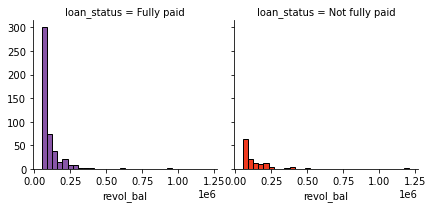

In [48]:
# similar
bins = np.linspace(df_sort_revb1.revol_bal.min(), df_sort_revb1.revol_bal.max(), 33)

g = sns.FacetGrid(df_sort_revb1, col="loan_status", hue="loan_status", palette=['#8856a7', '#f03b20'])
g.map(plt.hist, 'revol_bal', bins=bins, ec="k")

plt.show()

In [49]:
df_sort_revb

,revol_bal,loan_status,count_in
0,0,Fully paid,262
1,0,Not fully paid,59
2,1,Fully paid,4
3,1,Not fully paid,1
4,2,Fully paid,2
...,...,...,...
8195,407794,Not fully paid,1
8196,508961,Not fully paid,1
8197,602519,Fully paid,1
8198,952013,Fully paid,1


In [50]:
s_sort_revu= df.groupby('revol_util')['fully_paid'].value_counts()
df_sort_revu = s_sort_revu.to_frame()

df_sort_revu.rename(columns={'fully_paid':'count_in'},inplace=True)

df_sort_revu.reset_index(inplace=True)
df_sort_revu.rename(columns={'fully_paid':'loan_status'},inplace=True)
df_sort_revu['loan_status'].replace({1:'Fully paid',0:'Not fully paid'},inplace=True)  
df_sort_revu.sort_values(by=['count_in'], ascending=False, inplace=True)

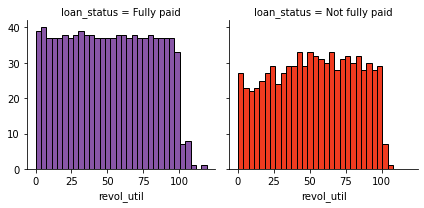

In [51]:
# more even for paid loans
bins = np.linspace(df_sort_revu.revol_util.min(), df_sort_revu.revol_util.max(), 33)

g = sns.FacetGrid(df_sort_revu, col="loan_status", hue="loan_status", palette=['#8856a7', '#f03b20'])
g.map(plt.hist, 'revol_util', bins=bins, ec="k")

plt.show()

In [52]:
s_sort_inq= df.groupby('inq_last_6mths')['fully_paid'].value_counts()
df_sort_inq = s_sort_inq.to_frame()

df_sort_inq.rename(columns={'fully_paid':'count_in'},inplace=True)

df_sort_inq.reset_index(inplace=True)
df_sort_inq.rename(columns={'fully_paid':'loan_status'},inplace=True)
df_sort_inq['loan_status'].replace({1:'Fully paid',0:'Not fully paid'},inplace=True)  
df_sort_inq.sort_values(by=['count_in'], ascending=False, inplace=True)

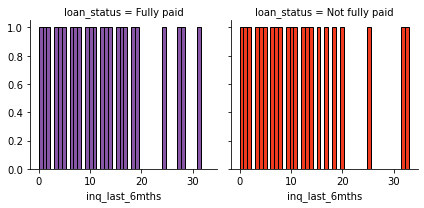

In [53]:
bins = np.linspace(df_sort_inq.inq_last_6mths.min(), df_sort_inq.inq_last_6mths.max(), 45)

g = sns.FacetGrid(df_sort_inq, col="loan_status", hue="loan_status", palette=['#8856a7', '#f03b20'])
g.map(plt.hist, 'inq_last_6mths', bins=bins, ec="k")

plt.show()

In [54]:
s_sort_dlq= df.groupby('delinq_2yrs')['fully_paid'].value_counts()
df_sort_dlq = s_sort_dlq.to_frame()

df_sort_dlq.rename(columns={'fully_paid':'count_in'},inplace=True)

df_sort_dlq.reset_index(inplace=True)
df_sort_dlq.rename(columns={'fully_paid':'loan_status'},inplace=True)
df_sort_dlq['loan_status'].replace({1:'Fully paid',0:'Not fully paid'},inplace=True)  
df_sort_dlq.sort_values(by=['count_in'], ascending=False, inplace=True)

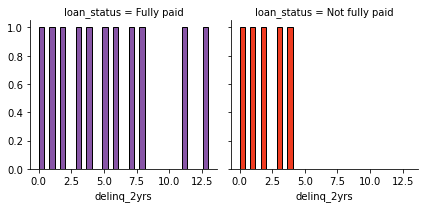

In [55]:
# similar
bins = np.linspace(df_sort_dlq.delinq_2yrs.min(), df_sort_dlq.delinq_2yrs.max(), 33)

g = sns.FacetGrid(df_sort_dlq, col="loan_status", hue="loan_status", palette=['#8856a7', '#f03b20'])
g.map(plt.hist, 'delinq_2yrs', bins=bins, ec="k")

plt.show()

In [56]:
s_sort_rec= df.groupby('pub_rec')['fully_paid'].value_counts()
df_sort_rec = s_sort_rec.to_frame()

df_sort_rec.rename(columns={'fully_paid':'count_in'},inplace=True)

df_sort_rec.reset_index(inplace=True)
df_sort_rec.rename(columns={'fully_paid':'loan_status'},inplace=True)
df_sort_rec['loan_status'].replace({1:'Fully paid',0:'Not fully paid'},inplace=True)  
df_sort_rec.sort_values(by=['count_in'], ascending=False, inplace=True)

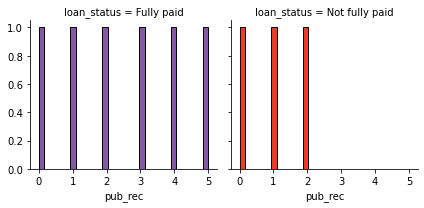

In [57]:
# similar
bins = np.linspace(df_sort_rec.pub_rec.min(), df_sort_rec.pub_rec.max(), 33)

g = sns.FacetGrid(df_sort_rec, col="loan_status", hue="loan_status", palette=['#8856a7', '#f03b20'])
g.map(plt.hist, 'pub_rec', bins=bins, ec="k")

plt.show()



<span style="color:black; font-size:20px" > Features such as **'days_with_cr_line', 'log_annual_inc', 'installment', 'dti', 'revol_util'**   seem to differ between the fully paid and not paid loans, as seen by comparing of the shapes and values of frequency distribution for each feature. </span>

# 3. Feature selection

For the first feature set, I select 'credit_policy','installment', 'log_annual_inc', 'dti', 'days_with_cr_line','revol_util' from the visualisations above.
For the second feature set, feature selection is performed with the SelectKBest() method and ANOVA-f measure from the scikit-learn library.


In [58]:
# numeric columns
df[num_cols].head()

,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec
0,0.1189,829.10,11.350407,19.48,737,5639,28854,52.1,0,0,0
1,0.1071,228.22,11.082143,14.29,707,2760,33623,76.7,0,0,0
2,0.1357,366.86,10.373491,11.63,682,4710,3511,25.6,1,0,0
3,0.1008,162.34,11.350407,8.10,712,2699,33667,73.2,1,0,0
4,0.1426,102.92,11.299732,14.97,667,4066,4740,39.5,0,1,0


In [59]:
# converting two categorical columns to dummies
df_cat = pd.get_dummies(data=df.purpose)
df_cat_col= df_cat[['credit_card','small_business']]
df_cat_col.head()

,credit_card,small_business
0,0,0
1,1,0
2,0,0
3,0,0
4,1,0


In [60]:
df1 = pd.concat([df[num_cols], df_cat_col, df['credit_policy']], axis=1)
df1.head()

,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,credit_card,small_business,credit_policy
0,0.1189,829.10,11.350407,19.48,737,5639,28854,52.1,0,0,0,0,0,1
1,0.1071,228.22,11.082143,14.29,707,2760,33623,76.7,0,0,0,1,0,1
2,0.1357,366.86,10.373491,11.63,682,4710,3511,25.6,1,0,0,0,0,1
3,0.1008,162.34,11.350407,8.10,712,2699,33667,73.2,1,0,0,0,0,1
4,0.1426,102.92,11.299732,14.97,667,4066,4740,39.5,0,1,0,1,0,1


In [61]:
# Normalizing data
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
all_features_scaled1 = scaler.fit_transform(df1)
all_features_scaled1

array([[-0.13931753,  2.46309947,  0.68038804, ..., -0.38955828,
        -0.26285458,  0.49222226],
       [-0.57886837, -0.43885443,  0.2440308 , ...,  2.56701001,
        -0.26285458,  0.49222226],
       [ 0.48648368,  0.23070836, -0.90865897, ..., -0.38955828,
        -0.26285458,  0.49222226],
       ...,
       [-0.57886837, -1.06867038, -0.54569448, ..., -0.38955828,
        -0.26285458, -2.03160257],
       [ 1.39166043,  0.1569135 , -0.18272998, ..., -0.38955828,
        -0.26285458, -2.03160257],
       [ 0.61685894,  2.58060136,  0.54059439, ..., -0.38955828,
        -0.26285458, -2.03160257]])

In [62]:
all_features_scaled1.shape

(9578, 14)

In [63]:
cols = ['int_rate', 'installment', 'log_annual_inc', 'dti', 'fico',
       'days_with_cr_line', 'revol_bal', 'revol_util', 'inq_last_6mths',
       'delinq_2yrs', 'pub_rec', 'credit_card', 'small_business',
       'credit_policy']
cols

['int_rate',
 'installment',
 'log_annual_inc',
 'dti',
 'fico',
 'days_with_cr_line',
 'revol_bal',
 'revol_util',
 'inq_last_6mths',
 'delinq_2yrs',
 'pub_rec',
 'credit_card',
 'small_business',
 'credit_policy']

In [64]:
# KBest

from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest,f_classif

In [65]:
# converting the target column so 'not fully paid' is set to 1.
df['fully_paid'].replace({'Not fully paid':1,'Fully paid':0}, inplace=True)
df.rename(columns={'fully_paid':'not_fully_paid'},inplace=True)
Y = df['not_fully_paid'].values

In [66]:
fs = SelectKBest(score_func=f_classif, k=5)  # choose 5 features
fit_selected = fs.fit(all_features_scaled1, Y)
fit_selected

SelectKBest(k=5, score_func=<function f_classif at 0x000000000C2741E0>)

In [67]:
fimportance = fit_selected.scores_

In [68]:
type(fimportance)

numpy.ndarray

In [69]:
print(fimportance)

[250.14120228  23.95686725  10.71979245  13.38566487 219.41737141
   8.19261323  27.69341779  64.96469182 218.77495366   0.75534635
  22.7037686   21.32336088  68.80088417 245.55524074]


In [70]:
idx = np.argsort(fimportance)
idx

array([ 9,  5,  2,  3, 11, 10,  1,  6,  7, 12,  8,  4, 13,  0],
      dtype=int64)

In [71]:
arr_i = np.array(cols)[idx]
arr_i

array(['delinq_2yrs', 'days_with_cr_line', 'log_annual_inc', 'dti',
       'credit_card', 'pub_rec', 'installment', 'revol_bal', 'revol_util',
       'small_business', 'inq_last_6mths', 'fico', 'credit_policy',
       'int_rate'], dtype='<U17')

In [72]:
fimportance[idx]

array([  0.75534635,   8.19261323,  10.71979245,  13.38566487,
        21.32336088,  22.7037686 ,  23.95686725,  27.69341779,
        64.96469182,  68.80088417, 218.77495366, 219.41737141,
       245.55524074, 250.14120228])

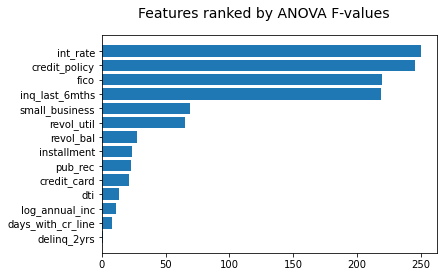

In [73]:
plt.barh(arr_i, fimportance[idx])
plt.suptitle('Features ranked by ANOVA F-values', fontsize=14)
plt.show()

##### Best 5 features are 'int_rate', 'credit_policy',  'fico', 'inq_last_6mths', 'small_business'.

# 4. Correlation and PCA analysis

In [74]:
df_num = df[num_cols]
df_corr = df_num.corr()
df_corr

,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec
int_rate,1.000000,0.276140,0.056383,0.220006,-0.714821,-0.124023,0.092527,0.464837,0.202780,0.156079,0.098162
installment,0.276140,1.000000,0.448102,0.050202,0.086039,0.183305,0.233625,0.081356,-0.010419,-0.004368,-0.032760
log_annual_inc,0.056383,0.448102,1.000000,-0.054065,0.114576,0.336895,0.372140,0.054881,0.029171,0.029203,0.016506
dti,0.220006,0.050202,-0.054065,1.000000,-0.241191,0.060101,0.188748,0.337109,0.029189,-0.021792,0.006209
fico,-0.714821,0.086039,0.114576,-0.241191,1.000000,0.263879,-0.015553,-0.541289,-0.185293,-0.216340,-0.147592
days_with_cr_line,-0.124023,0.183305,0.336895,0.060101,0.263879,1.000000,0.229346,-0.024240,-0.041737,0.081372,0.071829
revol_bal,0.092527,0.233625,0.372140,0.188748,-0.015553,0.229346,1.000000,0.203779,0.022394,-0.033243,-0.031010
revol_util,0.464837,0.081356,0.054881,0.337109,-0.541289,-0.024240,0.203779,1.000000,-0.013880,-0.042740,0.066717
inq_last_6mths,0.202780,-0.010419,0.029171,0.029189,-0.185293,-0.041737,0.022394,-0.013880,1.000000,0.021245,0.072673
delinq_2yrs,0.156079,-0.004368,0.029203,-0.021792,-0.216340,0.081372,-0.033243,-0.042740,0.021245,1.000000,0.009184


In [75]:
# int_rate/fico, revol_util/fico, int_rate/revol_util, log_annual_inc/installment, log_annual_inc/revol_bal seem to be significantly correlated.
df_big_corr = df_corr.apply(lambda x: [y if abs(y) >= 0.35 else 'less' for y in x])
df_big_corr

,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec
int_rate,1,less,less,less,-0.714821,less,less,0.464837,less,less,less
installment,less,1,0.448102,less,less,less,less,less,less,less,less
log_annual_inc,less,0.448102,1,less,less,less,0.37214,less,less,less,less
dti,less,less,less,1,less,less,less,less,less,less,less
fico,-0.714821,less,less,less,1,less,less,-0.541289,less,less,less
days_with_cr_line,less,less,less,less,less,1,less,less,less,less,less
revol_bal,less,less,0.37214,less,less,less,1,less,less,less,less
revol_util,0.464837,less,less,less,-0.541289,less,less,1,less,less,less
inq_last_6mths,less,less,less,less,less,less,less,less,1,less,less
delinq_2yrs,less,less,less,less,less,less,less,less,less,1,less


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5]),
 [Text(0.5, 0, 'int_rate'),
  Text(1.5, 0, 'installment'),
  Text(2.5, 0, 'log_annual_inc'),
  Text(3.5, 0, 'dti'),
  Text(4.5, 0, 'fico'),
  Text(5.5, 0, 'days_with_cr_line'),
  Text(6.5, 0, 'revol_bal'),
  Text(7.5, 0, 'revol_util'),
  Text(8.5, 0, 'inq_last_6mths'),
  Text(9.5, 0, 'delinq_2yrs'),
  Text(10.5, 0, 'pub_rec')])

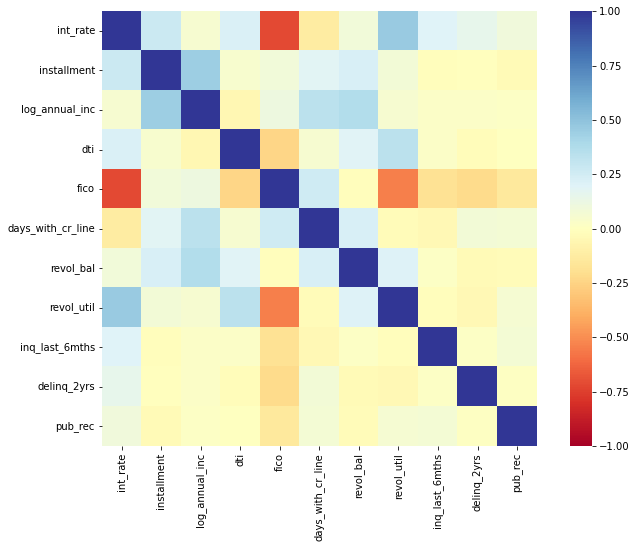

In [76]:
fig,ax = plt.subplots (figsize =(12,8))
sns.heatmap(df_corr, square=True, vmin =-1, vmax=1, cmap='RdYlBu')
plt.xticks(rotation=90)

### Principle Component Analysis

In [77]:
df.purpose.unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

In [122]:
## Adding two non-numeric columns wtih  purpose = credit card and = small business
df_cat = pd.get_dummies(data=df.purpose)
df_cat_col= df_cat[['credit_card','small_business']]
df_cat_col

,credit_card,small_business
0,0,0
1,1,0
2,0,0
3,0,0
4,1,0
...,...,...
9573,0,0
9574,0,0
9575,0,0
9576,0,0


In [123]:
df2 = pd.concat([df[num_cols], df_cat_col], axis=1)
df2.head()

,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,credit_card,small_business
0,0.1189,829.10,11.350407,19.48,737,5639,28854,52.1,0,0,0,0,0
1,0.1071,228.22,11.082143,14.29,707,2760,33623,76.7,0,0,0,1,0
2,0.1357,366.86,10.373491,11.63,682,4710,3511,25.6,1,0,0,0,0
3,0.1008,162.34,11.350407,8.10,712,2699,33667,73.2,1,0,0,0,0
4,0.1426,102.92,11.299732,14.97,667,4066,4740,39.5,0,1,0,1,0


In [124]:
df2.shape

(9578, 13)

In [81]:
# Normalizing data
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
all_features_scaled2 = scaler.fit_transform(df2)
all_features_scaled2

array([[-0.13931753,  2.46309947,  0.68038804, ..., -0.23700318,
        -0.38955828, -0.26285458],
       [-0.57886837, -0.43885443,  0.2440308 , ..., -0.23700318,
         2.56701001, -0.26285458],
       [ 0.48648368,  0.23070836, -0.90865897, ..., -0.23700318,
        -0.38955828, -0.26285458],
       ...,
       [-0.57886837, -1.06867038, -0.54569448, ..., -0.23700318,
        -0.38955828, -0.26285458],
       [ 1.39166043,  0.1569135 , -0.18272998, ..., -0.23700318,
        -0.38955828, -0.26285458],
       [ 0.61685894,  2.58060136,  0.54059439, ..., -0.23700318,
        -0.38955828, -0.26285458]])

In [82]:
#df['fully_paid'].replace({'Not fully paid':1,'Fully paid':0}, inplace=True)
y = df['not_fully_paid']
y.shape

(9578,)

In [83]:
df['not_fully_paid'].value_counts()

0    8045
1    1533
Name: fully_paid, dtype: int64

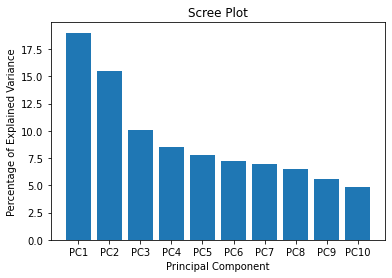

In [84]:
# Choosing the number of PCA components: it looks like each of the first 3 PCA components explain over 10% of varience.
from sklearn.decomposition import PCA
pca = PCA(n_components = 10) #n_components = 8
X_train_pca = pca.fit_transform(all_features_scaled2)
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
 
import matplotlib.pyplot as plt    
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

In [85]:
from sklearn.model_selection import train_test_split
X_trainpca, X_testpca, y_trainpca, y_testpca = train_test_split(X_train_pca, y, test_size = 0.2, random_state=18)

# 5. Modelling the loan payoff.

I use the features from the PCA analysis and then features including two newly designed features. The Neural Networks model uses all features. I choose the model with the highest recall score for prediction.

In [88]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score, accuracy_score, roc_auc_score, f1_score, precision_score
from sklearn.metrics import classification_report,confusion_matrix

## Modelling approach 1. Using PCA features.

### Logistic regression

In [253]:
lr = LogisticRegression(class_weight='balanced', solver = 'sag') # using class_weight = balanced for our imbalanced target variable. 
lr.fit(X_trainpca, y_trainpca)


y_test_predict  = lr.predict(X_testpca)
print('Accuracy of RF classifier on training set: {:.6f}'
     .format(lr.score(X_trainpca, y_trainpca)))
print('Accuracy of RF classifier on test set: {:.6f}'
     .format(lr.score(X_testpca, y_testpca)))

print('Recall of DT classifier on test set: {:.6f}'
      .format(recall_score(y_testpca, y_test_predict)))

Accuracy of RF classifier on training set: 0.625163
Accuracy of RF classifier on test set: 0.601775
Recall of DT classifier on test set: 0.601266


### Decision Tree and Random Forest models

In [91]:
dt = DecisionTreeClassifier()
#grid_values = {'criterion':['gini','entropy'], 'max_depth': [3,4,6]}
#grid_dt_auc = GridSearchCV( dt, param_grid = grid_values, cv=5, scoring='roc_auc')
#grid_dt_auc.fit(X_trainpca, y_trainpca)
#print('Grid best parameter (max. AUC): ', grid_dt_auc.best_params_)
dtc = DecisionTreeClassifier(class_weight='balanced',criterion = 'gini', max_depth = 4, min_samples_leaf = 6, random_state = 0).fit(X_trainpca, y_trainpca)

y_test_predict  = dtc.predict(X_testpca)


print('Accuracy of DT classifier on training set: {:.5f}'
     .format(dtc.score(X_trainpca, y_trainpca)))
print('Accuracy of DT classifier on test set: {:.6f}'
     .format(dtc.score(X_testpca, y_testpca)))

print('Recall of DT classifier on test set: {:.6f}'
      .format(recall_score(y_testpca, y_test_predict)))

Accuracy of DT classifier on training set: 0.58744
Accuracy of DT classifier on test set: 0.568894
Recall of DT classifier on test set: 0.636076


In [255]:
rf = RandomForestClassifier()
#grid_values = {'max_depth': [4,6,8],'n_estimators': [10,12,14]}
#grid_rf_auc = GridSearchCV( rf, param_grid = grid_values, cv=3, scoring='roc_auc')
#grid_rf_auc.fit(X_trainpca, y_trainpca)
#print('Grid best parameter (max. AUC): ', grid_rf_auc.best_params_)

rfc = RandomForestClassifier(class_weight='balanced', n_estimators = 14, max_depth=4, max_features = None, random_state = 4).fit(X_trainpca, y_trainpca)
y_test_predict  = rfc.predict(X_testpca)
print('Accuracy of RF classifier on training set: {:.6f}'
     .format(rfc.score(X_trainpca, y_trainpca)))
print('Accuracy of RF classifier on test set: {:.6f}'
     .format(rfc.score(X_testpca, y_testpca)))

print('Recall of RF classifier on test set: {:.6f}'
      .format(recall_score(y_testpca, y_test_predict)))

Accuracy of RF classifier on training set: 0.627121
Accuracy of RF classifier on test set: 0.602296
Recall of RF classifier on test set: 0.629747


### Gradient Boosting

In [251]:
gr = GradientBoostingClassifier()
#grid_values = {'learning_rate': [0.008,0.009,0.1],'n_estimators': [300,320]}
#grid_grc = GridSearchCV( gr, param_grid = grid_values, cv=5, scoring='roc_auc')
#grid_grc.fit(X_trainpca, y_trainpca)

#print('Model best parameter (max. AUC): ', grid_grc.best_params_)
#print('Model score (AUC): ', grid_grc.best_score_)
  
grc= GradientBoostingClassifier(learning_rate = 0.009, max_depth = 4, n_estimators=300).fit(X_trainpca, y_trainpca)
y_test_predict  = grc.predict(X_testpca)
print('Accuracy of GB classifier on training set: {:.5f}'
     .format(grc.score(X_trainpca, y_trainpca)))
print('Accuracy of GB classifier on test set: {:.5f}'
     .format(grc.score(X_testpca, y_testpca)))

print('Recall of RF classifier on test set: {:.6f}'
      .format(recall_score(y_testpca, y_test_predict)))

Accuracy of GB classifier on training set: 0.84704
Accuracy of GB classifier on test set: 0.83403
Recall of RF classifier on test set: 0.003165


### Support Vector Classifier

In [120]:
svm_r = SVC(class_weight='balanced', probability=True)
grid_values = [{'C':[5,10,12],'gamma':[0.003,0.005],'kernel': ['rbf']}]

optimal_params = GridSearchCV(svm_r,grid_values,cv=5, verbose=0,scoring="roc_auc")

optimal_params.fit(X_trainpca, y_trainpca)
optimal_params.best_params_

{'C': 10, 'gamma': 0.005, 'kernel': 'rbf'}

In [89]:
svm_model_pca = SVC(class_weight='balanced',probability=True, gamma=0.005, C = 10, kernel = 'rbf').fit(X_trainpca, y_trainpca)

y_test_predict  = svm_model_pca.predict(X_testpca)
print('Accuracy of SV classifier on training set: {:.5f}'
     .format(svm_model_pca.score(X_trainpca, y_trainpca)))
print('Accuracy of SV classifier on test set: {:.5f}'
     .format(svm_model_pca.score(X_testpca, y_testpca)))

print('Recall of SV classifier on test set: {:.6f}'
      .format(recall_score(y_testpca, y_test_predict)))

Accuracy of SV classifier on training set: 0.58979
Accuracy of SV classifier on test set: 0.57829
Recall of SV classifier on test set: 0.702532


In [123]:
svm_l = SVC()
grid_values = [{'C':[5,10],'gamma':[0.003,0.005],'kernel': ['linear']}]

optimal_params = GridSearchCV(svm_l,grid_values,cv=5, verbose=0,scoring="roc_auc")

optimal_params.fit(X_trainpca, y_trainpca)
optimal_params.best_params_

{'C': 5, 'gamma': 0.003, 'kernel': 'linear'}

In [249]:
svm_model_pca2 = SVC(class_weight='balanced', gamma=0.003, C = 10, kernel = 'linear').fit(X_trainpca, y_trainpca)

y_test_predict  = svm_model_pca2.predict(X_testpca)
print('Accuracy of SV classifier on training set: {:.5f}'
     .format(svm_model_pca2.score(X_trainpca, y_trainpca)))
print('Accuracy of SV classifier on test set: {:.5f}'
     .format(svm_model_pca2.score(X_testpca, y_testpca)))
print('Recall of SV classifier on test set: {:.6f}'
      .format(recall_score(y_testpca, y_test_predict)))

Accuracy of SV classifier on training set: 0.61355
Accuracy of SV classifier on test set: 0.59134
Recall of SV classifier on test set: 0.620253


### Model estimation

In [126]:
df['not_fully_paid'].value_counts()

0    8045
1    1533
Name: not_fully_paid, dtype: int64

In [256]:
def show_scores_pca(model, X=X_testpca, y=y_testpca):

    scores = []

    for m in model:

        y_test_predict  = m.predict(X)

        name = f"{m}".split("(")[0]
        scores.append([name, 'roc_auc', 'test', roc_auc_score(y, y_test_predict)])
        scores.append([name, 'recall', 'test', recall_score(y, y_test_predict)])
        scores.append([name, 'precision', 'test', precision_score(y, y_test_predict)])
        scores.append([name, 'f1-score', 'test', f1_score(y, y_test_predict,average='weighted')])
        scores.append([name, 'accuracy', 'test', accuracy_score(y, y_test_predict)])
        
    scores_df =  pd.DataFrame(scores,columns=['model_name','metric','test','score'])
    display(scores_df.pivot(index='model_name', columns=['metric'], values='score').round(4)) 
    
    
    return scores_df    

In [257]:
model_scores = show_scores_pca([lr, dtc, rfc, grc, svm_model_pca], X_testpca, y_testpca)

metric,accuracy,f1-score,precision,recall,roc_auc
model_name,,,,,
DecisionTreeClassifier,0.5689,0.6242,0.2204,0.6361,0.5959
GradientBoostingClassifier,0.8340,0.7605,0.2500,0.0032,0.5006
LogisticRegression,0.6018,0.6530,0.2297,0.6013,0.6016
RandomForestClassifier,0.6023,0.6535,0.2358,0.6297,0.6133
SVC,0.5783,0.6320,0.2372,0.7025,0.6281


The Decision Tree model  predicts incorrectly **115 loans**. these loans were predicted as fully paid while  they were not paid.

Text(0.5, 15.0, 'Predicted values')

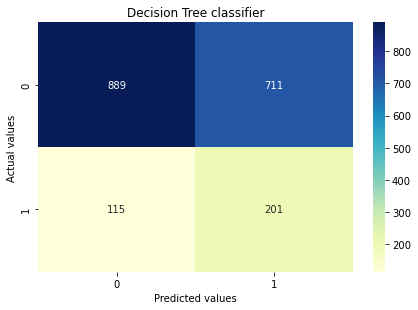

In [92]:
y_test_predict  = dtc.predict(X_testpca)

sns.heatmap(pd.DataFrame(confusion_matrix(y_testpca, y_test_predict)), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Decision Tree classifier')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')

The SVM model  predicts incorrectly **94 loans**. these loans were predicted as fully paid while  they were not paid.


Text(0.5, 15.0, 'Predicted values')

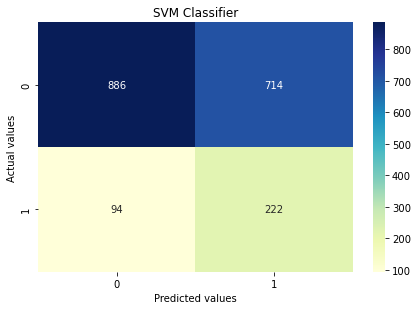

In [99]:

y_test_predict  = svm_model_pca.predict(X_testpca)

sns.heatmap(pd.DataFrame(confusion_matrix(y_testpca, y_test_predict)), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('SVM Classifier')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')    

In [129]:
def show_adj_scores(model, X=X_testpca, y=y_testpca):

    scores = []

    for m in model:

        y_test_predict  = m.predict(X)

        name = f"{m}".split("(")[0]

        scores.append([name, 'recall', 'test', recall_score(y, y_test_predict)])
        scores.append([name, 'f1-score_adj', 'test', \
                       (1+4)*(precision_score(y, y_test_predict)*recall_score(y, y_test_predict))/\
                       ((4*precision_score(y, y_test_predict))+recall_score(y, y_test_predict))])
        
    scores_df =  pd.DataFrame(scores,columns=['model_name','metric','test','score'])
    display(scores_df.pivot(index='model_name', columns=['metric'], values='score').round(4)) 
        
    return scores_df    

In [130]:
model_adj_scores = show_adj_scores([lr1, dtc1, rfc1, grc1, svm_model1], X_testpca, y_testpca)

metric,f1-score_adj,recall
model_name,,
DecisionTreeClassifier,0.4619,0.6361
GradientBoostingClassifier,0.0039,0.0032
LogisticRegression,0.4543,0.6013
RandomForestClassifier,0.4720,0.6297
SVC,0.5045,0.7025


In this case, misclassifying the minority class (loans not paid) is more costly than misclassifying the majority class (loans are fully paid). In other words,  correctly classifying the loans prone to default is more important. **Recall and a more general F1 score** (the F1 score using a positive real factor β, where β is chosen such that recall is considered β times as important as precision) could serve well as metrics. Therefore **the SVC with the rbf kernel and Decision Tree/ Random Forest classifier** are the best models.

 ## Modelling approach 2. Engineering new features.

In [127]:
df2.columns

Index(['int_rate', 'installment', 'log_annual_inc', 'dti', 'fico',
       'days_with_cr_line', 'revol_bal', 'revol_util', 'inq_last_6mths',
       'delinq_2yrs', 'pub_rec', 'credit_card', 'small_business'],
      dtype='object')

#### Some pairs of features including  int_rate/fico, revol_util/fico,  int_rate/revol_util, log_annual_inc/installment,appreared highly correlated. Lets create two new combined features instead.

In [128]:
#df2['mult_int_fico']   = df2['int_rate'] * df2['fico']
df2['mult_inc_inst']  = df2['log_annual_inc'] * df2['installment'] 
df2['mult_int_re_util'] = df2['int_rate'] * df2['revol_util']
df2.columns

Index(['int_rate', 'installment', 'log_annual_inc', 'dti', 'fico',
       'days_with_cr_line', 'revol_bal', 'revol_util', 'inq_last_6mths',
       'delinq_2yrs', 'pub_rec', 'credit_card', 'small_business',
       'mult_inc_inst', 'mult_int_re_util'],
      dtype='object')

In [129]:
df3 = pd.concat([df2, df.credit_policy], axis=1)
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   int_rate           9578 non-null   float64
 1   installment        9578 non-null   float64
 2   log_annual_inc     9578 non-null   float64
 3   dti                9578 non-null   float64
 4   fico               9578 non-null   int64  
 5   days_with_cr_line  9578 non-null   int32  
 6   revol_bal          9578 non-null   int64  
 7   revol_util         9578 non-null   float64
 8   inq_last_6mths     9578 non-null   int64  
 9   delinq_2yrs        9578 non-null   int64  
 10  pub_rec            9578 non-null   int64  
 11  credit_card        9578 non-null   uint8  
 12  small_business     9578 non-null   uint8  
 13  mult_inc_inst      9578 non-null   float64
 14  mult_int_re_util   9578 non-null   float64
 15  credit_policy      9578 non-null   int64  
dtypes: float64(7), int32(1),

In [130]:
# Normalizing data
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
all_features_scaled3 = scaler.fit_transform(df3)
all_features_scaled3

array([[-0.13931753,  2.46309947,  0.68038804, ...,  2.43577443,
         0.02126567,  0.49222226],
       [-0.57886837, -0.43885443,  0.2440308 , ..., -0.42201553,
         0.48223647,  0.49222226],
       [ 0.48648368,  0.23070836, -0.90865897, ...,  0.10808059,
        -0.59966007,  0.49222226],
       ...,
       [-0.57886837, -1.06867038, -0.54569448, ..., -1.04192086,
         0.63377706, -2.03160257],
       [ 1.39166043,  0.1569135 , -0.18272998, ...,  0.10741557,
        -1.27562033, -2.03160257],
       [ 0.61685894,  2.58060136,  0.54059439, ...,  2.51999892,
         0.41829693, -2.03160257]])

In [131]:
y = df['not_fully_paid']

In [132]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(all_features_scaled3, y, test_size = 0.2, random_state=18)

### Logistic 

In [133]:
lr1 = LogisticRegression(class_weight='balanced', solver = 'sag')
lr1.fit(X_train1, y_train1)

y_test_predict  = lr1.predict(X_test1)
print('Accuracy of logistic classifier on training set: {:.6f}'
     .format(lr1.score(X_train1, y_train1)))
print('Accuracy of logistic classifier on test set: {:.6f}'
     .format(lr1.score(X_test1, y_test1)))

print('Recall of logistic classifier on test set: {:.6f}'
      .format(recall_score(y_test1, y_test_predict)))

Accuracy of logistic classifier on training set: 0.634821
Accuracy of logistic classifier on test set: 0.628392
Recall of logistic classifier on test set: 0.655063


### Decision Tree

In [134]:
dt = DecisionTreeClassifier()
grid_values = {'criterion':['gini','entropy'], 'max_depth': [3,4,6]}
grid_dt_auc = GridSearchCV( dt, param_grid = grid_values, cv=5, scoring='roc_auc')
grid_dt_auc.fit(X_train1, y_train1)

dtc1 = DecisionTreeClassifier(class_weight='balanced', criterion = 'entropy', max_depth = 4, min_samples_leaf = 6, random_state = 0).fit(X_train1, y_train1)

y_test_predict  = dtc1.predict(X_test1)
print('Grid best parameter (max. AUC): ', grid_dt_auc.best_params_)

print('Accuracy of DT classifier on training set: {:.5f}'
     .format(dtc1.score(X_train1, y_train1)))
print('Accuracy of DT classifier on test set: {:.6f}'
     .format(dtc1.score(X_test1, y_test1)))

print('Recall of DT classifier on test set: {:.6f}'
      .format(recall_score(y_test1, y_test_predict)))

Grid best parameter (max. AUC):  {'criterion': 'entropy', 'max_depth': 4}
Accuracy of DT classifier on training set: 0.56186
Accuracy of DT classifier on test set: 0.543319
Recall of DT classifier on test set: 0.696203


### Random Forest

In [172]:
rf = RandomForestClassifier()
#grid_values = {'max_depth': [3,4,6],'n_estimators': [14,16,18]}
#grid_rf_auc = GridSearchCV( rf, param_grid = grid_values, cv=5, scoring='roc_auc')
#grid_rf_auc.fit(X_train1, y_train1)
#print('Grid best parameter (max. AUC): ', grid_rf_auc.best_params_)

rfc1 = RandomForestClassifier(class_weight='balanced', n_estimators = 16, max_depth=3, max_features = None, random_state = 4).fit(X_train1, y_train1)

y_test_predict  = rfc1.predict(X_test1)
print('Accuracy of RF classifier on training set: {:.6f}'
     .format(rfc1.score(X_train1, y_train1)))
print('Accuracy of RF classifier on test set: {:.6f}'
     .format(rfc1.score(X_test1, y_test1)))

print('Recall of RF classifier on test set: {:.6f}'
      .format(recall_score(y_test1, y_test_predict)))

Accuracy of RF classifier on training set: 0.608979
Accuracy of RF classifier on test set: 0.593946
Recall of RF classifier on test set: 0.645570


### Gradient Boosting Classifier

In [136]:
gr = GradientBoostingClassifier()
#grid_values = {'learning_rate': [0.008,0.009,0.1],'n_estimators': [300,320]}
#grid_grc = GridSearchCV( gr, param_grid = grid_values, cv=5, scoring='roc_auc')
#grid_grc.fit(X_train1, y_train1)

#print('Model best parameter (max. AUC): ', grid_grc.best_params_)
#print('Model score (AUC): ', grid_grc.best_score_)
    
grc1= GradientBoostingClassifier(learning_rate = 0.009, max_depth = 4, n_estimators=300).fit(X_train1, y_train1)

y_test_predict  = grc1.predict(X_test1)
print('Accuracy of GB classifier on training set: {:.5f}'
     .format(grc1.score(X_train1, y_train1)))
print('Accuracy of GB classifier on test set: {:.5f}'
     .format(grc1.score(X_test1, y_test1)))

print('Recall of GB classifier on test set: {:.6f}'
      .format(recall_score(y_test1, y_test_predict)))

Accuracy of GB classifier on training set: 0.84652
Accuracy of GB classifier on test set: 0.83403
Recall of GB classifier on test set: 0.006329


### Support Vector Classifier

In [139]:
svm_r = SVC(class_weight='balanced', probability=True)
grid_values = [{'C':[5,8],'gamma':[0.003,0.005],'kernel': ['rbf']}]

optimal_params = GridSearchCV(svm_r,grid_values,cv=5, verbose=0,scoring="roc_auc")

optimal_params.fit(X_train1, y_train1)
optimal_params.best_params_

{'C': 5, 'gamma': 0.003, 'kernel': 'rbf'}

In [144]:
svm_model1 = SVC(class_weight='balanced', probability=True, gamma=0.005, C = 10, kernel = 'rbf').fit(X_train1, y_train1)

y_test_predict  = svm_model1.predict(X_test1)
print('Accuracy of SV classifier on training set: {:.5f}'
     .format(svm_model1.score(X_train1, y_train1)))
print('Accuracy of SV classifier on test set: {:.5f}'
     .format(svm_model1.score(X_test1, y_test1)))

print('Recall of SV classifier on test set: {:.6f}'
      .format(recall_score(y_test1, y_test_predict)))

Accuracy of SV classifier on training set: 0.68168
Accuracy of SV classifier on test set: 0.66858
Recall of SV classifier on test set: 0.591772


### Model estimation

In [173]:
def show_scores_1(model, X=X_test1, y=y_test1):

    scores = []

    for m in model:

        y_test_predict  = m.predict(X)

        name = f"{m}".split("(")[0]
        scores.append([name, 'roc_auc', 'test', roc_auc_score(y, y_test_predict)])
        scores.append([name, 'recall', 'test', recall_score(y, y_test_predict)])
        scores.append([name, 'precision', 'test', precision_score(y, y_test_predict)])
        scores.append([name, 'f1-score', 'test', f1_score(y, y_test_predict,average='weighted')])
        scores.append([name, 'accuracy', 'test', accuracy_score(y, y_test_predict)])
        
    scores_df =  pd.DataFrame(scores,columns=['model_name','metric','test','score'])
    display(scores_df.pivot(index='model_name', columns=['metric'], values='score').round(4)) 
    
    
    return scores_df 

In [174]:
model_scores = show_scores_1([lr1, dtc1, rfc1, grc1, svm_model1], X_test1, y_test1)

metric,accuracy,f1-score,precision,recall,roc_auc
model_name,,,,,
DecisionTreeClassifier,0.5433,0.6000,0.2202,0.6962,0.6047
GradientBoostingClassifier,0.8340,0.7615,0.3333,0.0063,0.5019
LogisticRegression,0.6284,0.6760,0.2556,0.6551,0.6391
RandomForestClassifier,0.5939,0.6463,0.2345,0.6456,0.6147
SVC,0.6686,0.7084,0.2698,0.5918,0.6378


In [175]:
def show_adj_scores_1(model, X=X_test1, y=y_test1):

    scores = []

    for m in model:

        y_test_predict  = m.predict(X)

        name = f"{m}".split("(")[0]

        scores.append([name, 'recall', 'test', recall_score(y, y_test_predict)])
        scores.append([name, 'f1-score_adj', 'test', \
                       (1+4)*(precision_score(y, y_test_predict)*recall_score(y, y_test_predict))/\
                       ((4*precision_score(y, y_test_predict))+recall_score(y, y_test_predict))])
        
    scores_df =  pd.DataFrame(scores,columns=['model_name','metric','test','score'])
    display(scores_df.pivot(index='model_name', columns=['metric'], values='score').round(4)) 
        
    return scores_df

In [176]:
model_adj_scores = show_adj_scores_1([lr1, dtc1, rfc1, grc1, svm_model1], X_test1, y_test1)

metric,f1-score_adj,recall
model_name,,
DecisionTreeClassifier,0.4861,0.6962
GradientBoostingClassifier,0.0079,0.0063
LogisticRegression,0.4990,0.6551
RandomForestClassifier,0.4780,0.6456
SVC,0.4778,0.5918


**The Decision Tree and Logistic regression classifiers** are the best models by the Recall and F1-score adjuted metrics. The Decision Tree model incorrectly classifies **96 loans**. these were the loans which were not paid.

Text(0.5, 15.0, 'Predicted values')

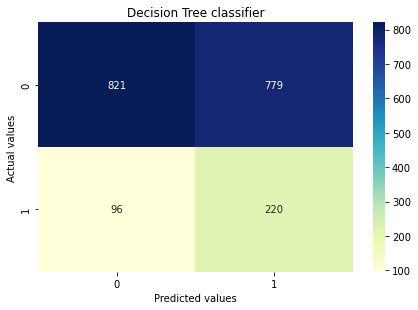

In [151]:
y_test_predict  = dtc1.predict(X_test1)

sns.heatmap(pd.DataFrame(confusion_matrix(y_test1, y_test_predict)), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Decision Tree classifier')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')

## Neural Networks

In [178]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [182]:
metrics = [tf.keras.metrics.TruePositives(name='tp'),
           tf.keras.metrics.FalsePositives(name='fp'),
           tf.keras.metrics.TrueNegatives(name='tn'),
           tf.keras.metrics.FalseNegatives(name='fn'),
           tf.keras.metrics.BinaryAccuracy(name='accuracy'),
           tf.keras.metrics.Precision(name='precision'),
           tf.keras.metrics.Recall(name='recall'),
           tf.keras.metrics.AUC(name='auc')]

In [233]:
metrics = [tf.keras.metrics.Recall(name='recall')]

In [234]:
modelnn1 = Sequential()
 
modelnn1.add(Dense(6, input_dim=16, kernel_initializer='normal', activation='sigmoid'))

modelnn1.add(Dense(4, kernel_initializer='normal', activation='sigmoid'))
    # Output layer with a binary classification ('paid' or not 'paid')
modelnn1.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
   
modelnn1.compile(loss='binary_crossentropy', optimizer='adam', metrics=metrics)

In [235]:
modelnn1.fit(X_train1, y_train1, epochs=20,verbose=2,validation_data=(X_test1, y_test1))

Train on 7662 samples, validate on 1916 samples
Epoch 1/20
7662/7662 - 1s - loss: 0.5819 - recall: 0.0000e+00 - val_loss: 0.4936 - val_recall: 0.0000e+00
Epoch 2/20
7662/7662 - 0s - loss: 0.4522 - recall: 0.0000e+00 - val_loss: 0.4425 - val_recall: 0.0000e+00
Epoch 3/20
7662/7662 - 0s - loss: 0.4299 - recall: 0.0000e+00 - val_loss: 0.4366 - val_recall: 0.0000e+00
Epoch 4/20
7662/7662 - 0s - loss: 0.4266 - recall: 0.0000e+00 - val_loss: 0.4346 - val_recall: 0.0000e+00
Epoch 5/20
7662/7662 - 0s - loss: 0.4249 - recall: 0.0000e+00 - val_loss: 0.4330 - val_recall: 0.0000e+00
Epoch 6/20
7662/7662 - 1s - loss: 0.4236 - recall: 0.0000e+00 - val_loss: 0.4317 - val_recall: 0.0000e+00
Epoch 7/20
7662/7662 - 0s - loss: 0.4223 - recall: 0.0000e+00 - val_loss: 0.4304 - val_recall: 0.0000e+00
Epoch 8/20
7662/7662 - 0s - loss: 0.4213 - recall: 0.0000e+00 - val_loss: 0.4292 - val_recall: 0.0000e+00
Epoch 9/20
7662/7662 - 0s - loss: 0.4203 - recall: 0.0000e+00 - val_loss: 0.4282 - val_recall: 0.0000e+0

In [236]:
loss, recall = modelnn1.evaluate(X_test1, y_test1, batch_size=32,  verbose=2)
print('NN loss score:', loss)
print('NN Test recall:', recall)

# There are 316 false negatives, 1600 TP, 0 FP, 0TP

1916/1916 - 0s - loss: 0.4221 - recall: 0.0000e+00
NN loss score: 0.4221264082230705
NN Test recall: 0.0


In [ ]:
# another NN model

In [179]:
metrics = [tf.keras.metrics.Recall(name='recall')]

In [181]:
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.001, beta_1 = 0.9, beta_2 = 0.999, epsilon = 1e-07, amsgrad = False)
model2 = Sequential()
model2.add(Dense(250, input_dim = 16, kernel_initializer='normal',activation='sigmoid'))
model2.add(Dense(500,activation = 'relu'))
model2.add(Dropout(0.1))
model2.add(Dense(1000, activation = 'relu'))
model2.add(Dropout(0.1))
model2.add(Dense(1000, activation = 'relu'))
model2.add(Dropout(0.1))
model2.add(Dense(500, activation = 'relu'))
model2.add(Dropout(0.1))
model2.add(Dense(250, activation = 'relu'))
model2.add(Dropout(0.1))
model2.add(Dense(1, activation = 'linear'))
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics= metrics) #['accuracy'])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [182]:
model2.fit (X_train1, y_train1, epochs=20,verbose=2,validation_data=(X_test1, y_test1))

Train on 7662 samples, validate on 1916 samples
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/20
7662/7662 - 12s - loss: 2.4500 - recall: 0.0000e+00 - val_loss: 2.5440 - val_recall: 0.0000e+00
Epoch 2/20
7662/7662 - 11s - loss: 2.4500 - recall: 0.0000e+00 - val_loss: 2.5440 - val_recall: 0.0000e+00
Epoch 3/20
7662/7662 - 10s - loss: 2.4500 - recall: 0.0000e+00 - val_loss: 2.5440 - val_recall: 0.0000e+00
Epoch 4/20
7662/7662 - 15s - loss: 2.4500 - recall: 0.0000e+00 - val_loss: 2.5440 - val_recall: 0.0000e+00
Epoch 5/20
7662/7662 - 19s - loss: 2.4500 - recall: 0.0000e+00 - val_loss: 2.5440 - val_recall: 0.0000e+00
Epoch 6/20
7662/7662 - 19s - loss: 2.4500 - recall: 0.0000e+00 - val_loss: 2.5440 - val_recall: 0.0000e+00
Epoch 7/20
7662/7662 - 17s - loss: 2.4500 - recall: 0.0000e+00 - val_loss: 2.5440 - val_recall: 0.0000e+00
Epoch 8/20
7662/7662 - 14s - loss: 2.4500 - recall: 0.0000e+00 - val_loss: 2.5440 - val_recall: 0.0000e+00
Ep

In [183]:
loss, recall = model2.evaluate(X_test1, y_test1, batch_size=32,  verbose=2)
print('Model_2 Test score:', loss)
print('Model_2 Test recall:', recall)

1916/1916 - 1s - loss: 2.5440 - recall: 0.0000e+00
Model_2 Test score: 2.5439894129687413
Model_2 Test recall: 0.0


The Neural Nets do not seem to work very well for this problem as the recall score is near 0.

# 6. Predicting the loan payoff.
The two best performing model are the SVC and Decision Tree yielding a  recall of 70% on the test data.  
The  SVC model classifies correctly the probability of 222 loans of not being paid. It classifies incorrectly 94 loans predicting them to be paid while they are not paid.
The  DT model classifies correctly the probability of 220 loans of not being paid. It classifies incorrectly 96 loans predicting them to be paid while they are not paid.

#### Support Vector Classifier with the rbc kernel

In [272]:
svm_model_pca = SVC(class_weight='balanced', gamma=0.005, C = 10, kernel = 'rbf').fit(X_trainpca, y_trainpca)

y_test_predict  = svm_model_pca.predict(X_testpca)
print('Recall of SV classifier on test set: {:.6f}'
      .format(recall_score(y_testpca, y_test_predict)))

Recall of SV classifier on test set: 0.702532


In [267]:
pred_loan_svc = svm_model_pca.predict_proba(X_testpca)[:, 1].astype(np.float32)
answer_SVC = pd.Series(pred_loan_svc)
answer_SVC

0       0.184416
1       0.275353
2       0.188070
3       0.160844
4       0.308849
          ...   
1911    0.044634
1912    0.173830
1913    0.129444
1914    0.084439
1915    0.122242
Length: 1916, dtype: float32

#### Decision Tree classifier

In [274]:
dtc1 = DecisionTreeClassifier(class_weight='balanced',criterion = 'entropy', max_depth = 4, min_samples_leaf = 6, random_state = 0).fit(X_train1, y_train1)

y_test_predict  = dtc1.predict(X_test1)

print('Recall of DT classifier on test set: {:.6f}'
      .format(recall_score(y_test1, y_test_predict)))

Recall of DT classifier on test set: 0.696203


In [177]:
pred_loan_DT = dtc1.predict_proba(X_test1)[:, 1].astype(np.float32)
answer_DT = pd.Series(pred_loan_DT)
answer_DT

0       0.421425
1       0.623632
2       0.658643
3       0.514869
4       0.514869
          ...   
1911    0.059881
1912    0.514869
1913    0.421425
1914    0.421425
1915    0.421425
Length: 1916, dtype: float32

### Judging Criteria
| CATEGORY | WEIGHTAGE | DETAILS                                                              |
|:---------|:----------|:---------------------------------------------------------------------|
| **Analysis** | 30%       | <ul><li>Documentation on the goal and what was included in the analysis</li><li>How the question was approached</li><li>Visualisation tools and techniques utilized</li></ul>       |
| **Results**  | 30%       | <ul><li>How the results derived related to the problem chosen</li><li>The ability to trigger potential further analysis</li></ul> |
| **Creativity** | 40% | <ul><li>How "out of the box" the analysis conducted is</li><li>Whether the publication is properly motivated and adds value</li></ul> |